#  First you need to install graphlab from here https://turi.com/download/install-graphlab-create.html
# It works with anaconda2 v4
# you can download the data from MovieLens or from the link https://grouplens.org/datasets/movielens/100k/
# It has 
# • 100,000 ratings (1-5) from 943 users on 682 movies.
# • Each user has rated at least 20 movies.
# • Simple demographic info for the users (age, gender, occupation, zip)


In [8]:
import pandas as pd
import numpy as np
import graphlab
import graphlab as gl
from graphlab import SFrame
import matplotlib as mpl
mpl.use('TkAgg')
from matplotlib import pyplot as plt
%matplotlib inline

C:\Users\Acer\Anaconda2\lib\site-packages\matplotlib\__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


# if you got the error 
1. Ensure user account has write permission to C:\Users\...\graphlab
2. Run graphlab.get_dependencies() to download and install them.
3. Restart Python and import graphlab again.
then you need to run "graphlab.get_dependencies()" in the command

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
user_id    100000 non-null int64
item_id    100000 non-null int64
rating     100000 non-null int64
dtypes: int64(3)
memory usage: 2.3 MB


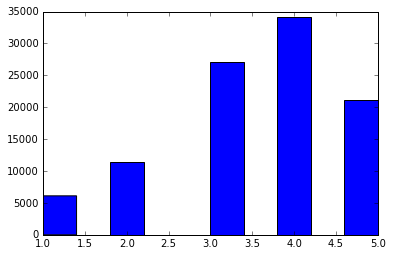

number of ratings 100000
number of movies 1682
number of users 943


In [9]:

col_names = ["user_id", "item_id", "rating", "timestamp"]
data = pd.read_table("u.data", names=col_names)
data = data.drop("timestamp", 1) # drop time stamp because it has no meaningful use
data.info()
plt.hist(data["rating"])
plt.show()
Number_Ratings = len(data)
Number_Movies = len(np.unique(data["item_id"]))
Number_Users = len(np.unique(data["user_id"]))

print("number of ratings "+str(Number_Ratings))
print("number of movies "+str(Number_Movies))
print("number of users "+str(Number_Users))

# Here we splite the data into train and test, train gets 70% of the data and test gets 30% of the data.

In [10]:
from sklearn.cross_validation import train_test_split
train, test = train_test_split(data, test_size = 0.3)

# Here I'm using SFrame to scale the data.
# SFrame is a tabular, column-mutable dataframe object that can scale to big data, which allows you to work with datasets that are larger than the amount of RAM on your system

In [11]:
import pandas
df = pandas.DataFrame()
sf = SFrame(data=df)
sf = SFrame(data='u.csv')

Finished parsing file C:\Users\Acer\Documents\Recommender system\u.csv

Parsing completed. Parsed 100 lines in 0.128159 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file C:\Users\Acer\Documents\Recommender system\u.csv

Parsing completed. Parsed 99999 lines in 0.079179 secs.

# In popularity when no target column is provided, the popularity is determined by the number of observations involving each item. When a target is provided, popularity is computed using the item’s mean target value

In [12]:
print("___________________popularity___________________")
   
popularity_model=graphlab.recommender.popularity_recommender.create(SFrame(train), user_id='user_id',
item_id='item_id', target='rating', user_data=None, item_data=None, random_seed=0, 
verbose=True)
popularity_recomm = popularity_model.recommend(users=[1,2,3,4,5],k=5) # k is the number of movies to recommend
popularity_recomm.print_rows(num_rows=25) #print the first 25 row

___________________popularity___________________


Recsys training: model = popularity

Preparing data set.

Data has 70000 observations with 943 users and 1641 items.

Data prepared in: 0.096006s

70000 observations to process; with 1641 unique items.

+---------+---------+-------+------+
| user_id | item_id | score | rank |
+---------+---------+-------+------+
|    1    |   1629  |  5.0  |  1   |
|    1    |   1599  |  5.0  |  2   |
|    1    |   1536  |  5.0  |  3   |
|    1    |   1293  |  5.0  |  4   |
|    1    |   1398  |  5.0  |  5   |
|    2    |   1629  |  5.0  |  1   |
|    2    |   1599  |  5.0  |  2   |
|    2    |   1536  |  5.0  |  3   |
|    2    |   1293  |  5.0  |  4   |
|    2    |   1398  |  5.0  |  5   |
|    3    |   1629  |  5.0  |  1   |
|    3    |   1599  |  5.0  |  2   |
|    3    |   1536  |  5.0  |  3   |
|    3    |   1293  |  5.0  |  4   |
|    3    |   1398  |  5.0  |  5   |
|    4    |   1629  |  5.0  |  1   |
|    4    |   1599  |  5.0  |  2   |
|    4    |   1536  |  5.0  |  3   |
|    4    |   1293  |  5.0  |  4   |
|    4    |   1398  |  5.0  |  5   |
|    5    |   1629  |  5.0  |  1   |
|    5    |   1599  |  5.0  |  2   |
|    5    |   1536  |  5.0  |  3   |
|    5    |   1293  |  5.0  |  4   |
|

# The idea behind factorization is to represent users and items in a lower dimensional latent space, by using matrix factorization as well as factorization machines models

In [13]:
print("_________________facrorization____________________")
factorization_model=graphlab.recommender.factorization_recommender.create(SFrame(train), user_id='user_id',
item_id='item_id', target='rating', user_data=None, item_data=None, num_factors=8,
regularization=1e-08, linear_regularization=1e-10, side_data_factorization=True,
nmf=False, binary_target=False, max_iterations=50, sgd_step_size=0,
random_seed=0, solver='auto', verbose=True)

factorization_recomm = factorization_model.recommend(users=[1,2,3,4,5],k=5)
factorization_recomm.print_rows(num_rows=25)

_________________facrorization____________________


Recsys training: model = factorization_recommender

Preparing data set.

Data has 70000 observations with 943 users and 1641 items.

Data prepared in: 0.09072s

Training factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 8        |

| regularization                 | L2 Regularization on Factors                     | 1e-008   |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-010   |

| max_iterations                 | Maximum Number of Iterations                     | 50       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 10000 / 70000 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 25                | Not Viable                               |

| 1       | 6.25              | Not Viable                               |

| 2       | 1.5625            | Not Viable                               |

| 3       | 0.390625          | Not Viable                               |

| 4       | 0.0976562         | 0.687929                                 |

| 5       | 0.0488281         | 0.720427                                 |

| 6       | 0.0244141         | 0.778132                                 |

| 7       | 0.012207          | 0.856195                                 |

+---------+-------------------+------------------------------------------+

| Final   | 0.0976562         | 0.687929                                 |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 0us          | 1.26976           | 1.12684               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 40.003ms     | 1.07745           | 1.038                 | 0.0976562   |

| 2       | 68.009ms     | 0.937067          | 0.968019              | 0.0580668   |

| 3       | 96.007ms     | 0.842087          | 0.917648              | 0.042841    |

| 4       | 124.008ms    | 0.762941          | 0.873457              | 0.0345267   |

| 5       | 156.011ms    | 0.700645          | 0.837035              | 0.029206    |

| 6       | 184.013ms    | 0.65392           | 0.80864               | 0.0254734   |

| 11      | 344.024ms    | 0.554697          | 0.744759              | 0.016168    |

| 50      | 1.89s        | 0.463548          | 0.680807              | 0.00519365  |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 0.439372

Final training RMSE: 0.662814

+---------+---------+---------------+------+
| user_id | item_id |     score     | rank |
+---------+---------+---------------+------+
|    1    |   253   | 6.04269708771 |  1   |
|    1    |   896   | 5.94200314659 |  2   |
|    1    |   169   | 5.86152829308 |  3   |
|    1    |   647   | 5.46032394547 |  4   |
|    1    |   1449  | 5.41100801605 |  5   |
|    2    |   641   | 6.29115913886 |  1   |
|    2    |   640   | 6.26002787131 |  2   |
|    2    |   887   |  6.012564645  |  3   |
|    2    |   516   | 5.95384691733 |  4   |
|    2    |   615   | 5.91874335784 |  5   |
|    3    |   525   | 6.35893998373 |  1   |
|    3    |   641   | 6.25947556723 |  2   |
|    3    |   741   | 6.17355618704 |  3   |
|    3    |   200   | 6.10770879019 |  4   |
|    3    |   1233  | 6.05138573873 |  5   |
|    4    |   207   | 6.95469737876 |  1   |
|    4    |   780   | 6.82228089202 |  2   |
|    4    |   1084  | 6.77851439345 |  3   |
|    4    |   613   | 6.74913574088 |  4   |
|    4    

# Item- similarity is used to create a recommender based on users in common.
# it uses jaccard similarity type.
# jaccard is used to measure the similarity between two set of elements
![](jaccard.png)

In [14]:

print("___________________item similarity_____________________")
item_similarity_model = graphlab.item_similarity_recommender.create(SFrame(train), user_id='user_id', item_id='item_id',
                                                                    target='rating', similarity_type='jaccard')

#Making recommendations
item_similarity_recomm = item_similarity_model.recommend(users=[1,2,3,4,5],k=5)
item_similarity_recomm.print_rows(num_rows=25)

___________________item similarity_____________________


Recsys training: model = item_similarity

Preparing data set.

Data has 70000 observations with 943 users and 1641 items.

Data prepared in: 0.112009s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 4ms                            | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 12ms                                | 0                | 2               |

| 168.01ms                            | 100              | 1641            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.184011s

+---------+---------+-----------------+------+
| user_id | item_id |      score      | rank |
+---------+---------+-----------------+------+
|    1    |   168   |  0.10434918129  |  1   |
|    1    |    82   | 0.0942894897536 |  2   |
|    1    |   568   | 0.0942560325118 |  3   |
|    1    |   423   | 0.0927081114335 |  4   |
|    1    |   385   | 0.0909578447567 |  5   |
|    2    |   100   |  0.11178384044  |  1   |
|    2    |    25   |  0.109791262583 |  2   |
|    2    |    50   |  0.104455869306 |  3   |
|    2    |   117   |  0.102962319147 |  4   |
|    2    |   181   |  0.101092549888 |  5   |
|    3    |   313   |  0.104717404414 |  1   |
|    3    |   748   | 0.0988484452932 |  2   |
|    3    |   301   | 0.0963256343817 |  3   |
|    3    |   322   | 0.0951393399483 |  4   |
|    3    |   269   | 0.0932805584027 |  5   |
|    4    |   328   | 0.0929992124438 |  1   |
|    4    |   333   | 0.0836636722088 |  2   |
|    4    |    98   | 0.0794060565531 |  3   |
|    4    |  